<a href="https://colab.research.google.com/github/sc8556/Analysis-of-Spotify-s-most-popular-songs/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_Spotify_%EC%9D%B8%EA%B8%B0%EA%B3%A1_%ED%8A%B9%EC%84%B1_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Project] Spotify 인기곡 특성 분석

### 가이드라인
1. 데이터 불러오기
2. 데이터 전처리
3. 탐색적 데이터 분석
4. 결론

---

## 1. 데이터 불러오기

필요한 패키지를 불러온 후 `pandas`를 사용하여 데이털르 읽고 어떠한 데이터가
저장되어 있는지 확인

In [ ]:
import os
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 작업 디렉터리 수정
os.chdir('/content/drive/MyDrive/Colab Notebooks/코드잇/데이터분석/data')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# spotify.csv 데이터프레임 생성
spotify_df = pd.read_csv('spotify.csv')
spotify_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## 2. 데이터 전처리

데이터의 기본 정보를 확인한 후, 결측값(Null)과 이상치(Outlier), 그리고 중복된 데이터를 확인하고 처리합니다.

### 2-1. Data Shape 확인

`shape` 속성을 사용해 데이터의 크기와 차원을 파악합니다.

In [ ]:
spotify_df.shape # 114,000 row(행), 20 col(열)로 구성된 데이터셋

(114000, 20)

### 2-2. Data Type 확인

`info()` 함수를 사용해 컬럼별 정보와 데이터 타입을 확인합니다.

In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

### 2-3. 결측값 확인

`isnull()` 함수와 `sum()` 함수를 함께 사용해 컬럼별 결측값(null)의 수를 확인합니다.

In [ ]:
spotify_df.isnull().sum()

,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


`track_id`, `artists`, `album_name` 컬럼에 결측값이 하나씩 존재하는 것으로 확인되었습니다.

이런 경우 동일한 로우에서 세 값이 모두 비어 있을 가능성이 높으므로 한번 확인해보겠습니다.

In [ ]:
# OR 조건으로 세 컬럼 중 하나라도 결측값을 갖는 로우를 모두 출력
spotify_df.query('track_id.isnull() | artists.isnull() | album_name.isnull()')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


예상대로 모두 '	1kR4gIb7nGxHPI3D2ifs59'라는 `track_id`를 갖는 하나의 곡에 존재하는 결측값인 걸로 확인됩니다.

해당 곡은 길이(`duration_ms`)도 0인걸 보니 제대로 된 곡이 아니라고 판단하여, 삭제하고 진행하겠습니다.

In [ ]:
spotify_df = spotify_df.dropna()

### 2-4. 이상치 확인

`describe()` 함수를 사용해 DateFrame에 대한 기술 통계를 확인합니다. 최솟값, 최댓값 등의 정보를 통해 이상치(Outlier)의 존재여부를 간접적으로 식별할 수 있습니다.

In [ ]:
spotify_df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


먼저 곡의 길이(`duration_ms`)의 최댓값이 5237295밀리초 (약 87분) 인 경우 한 곡의 길이 치고는 너무 길다고 생각되지만 확인해보니 실제로 길이가 긴 곡이므로 별다른 조치를 하지 않겠습니다.

그 외에는 특별히 문제되는 값은 없어보입니다. `loudness`컬럼의 경우 데시벨이브로 음수값이 존재할 수 있습니다.

이어서 범주형 변수에 대해서도 기술 통계를 확인해보겠습니다.

`include='object'`라고 지정해 주면 범주형 변수에 대해서도 결과가 반환되며 이 경우에는 데이터 수, unique 수, 가장 빈번하게 나타나는 값에 대한 요약이 결과에 포함됩니다.

In [ ]:
spotify_df.describe(include='object')

,track_id,artists,album_name,track_name,track_genre
count,113999,113999,113999,113999,113999
unique,89740,31437,46589,73608,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,acoustic
freq,9,279,195,151,1000


`track_id`는 노래의 고유한 ID인데, 전체 데이터 개수 대비 고유한 값(unique)의 수가 적데 확인된다는 점이 이상합니다. 중복된 값이 있는 것으로 추정되므로 이후 중복 데이터 확인 단계에서 다시 자세하게 살펴보겠습니다.

### 2-5 중복 데이터 확인

데이터에 중복된 값이 포함되어 있을 경우, 정확하지 않은 분석 결과가 도출될 수 있습니다. 분석 전에는 반드시 중복 데이터가 있는지 확인한 후 삭제하는 과정이 필요합니다.

`duplicated()` 함수와 `sum()` 함수를 함계 사용하면 중복 데이터의 존재 여부를 확인할 수 있습니다.

(참고로, `duplicated()`의 결과로 각 중복 그룹의 첫 번째 데이터는 반환되지 않으므로, `duplicated().sum()`의 결과는 중복된 데이터 중 첫 번째를 제외하고 집계된 수치입니다.)

In [ ]:
spotify_df.duplicated().sum()

np.int64(450)

`drop_duplicates()` 함수를 사용하면 중복된 데이터를 삭제할 수 있습니다. (각 중복 그룹의 첫 번째 데이터만 남겨집니다.)

In [ ]:
# 중복 데이터를 삭제한 DataFrame을 다시 spotify_df에 저장합니다.
spotify_df = spotify_df.drop_duplicates()

In [ ]:
# 중복 데이터가 모두 사라졌는지 확인합니다.
spotify_df.duplicated().sum()

np.int64(0)

전체 컬럼 기준으로 중복된 450개의 데이터는 삭제를 완료했지만, 확인해 보니 여전이 `track_id` 기준으로는 중복된 로우가 존재합니다.

(`subset` 파라미터를 활용하면 전체 컬럼이 아닌 특정 컬럼만을 기준으로 중복값을 점검할 수 있습니다.)

In [ ]:
spotify_df.duplicated(subset='track_id').sum()

np.int64(23809)

In [ ]:
spotify_df['track_id'].value_counts().head(10)

,count
track_id,
6S3JlDAGk3uu3NtZbPnuhS,9
2kkvB3RNRzwjFdGhaUA0tz,8
2Ey6v4Sekh3Z0RUSISRosD,8
7tbzfR8ZvZzJEzy6v0d6el,7
5BI1XqMJK91dsEq0Bfe0Ov,7
5ftfVzSLIi5ZxYdNbRtf41,7
54zCdkbIALAnv8Ihi3XWlD,7
5sqkarfxe7UejHTlCtHCLS,7
2vU6bm5hVF2idVknGzqyPL,7


9건의 중복 데이터를 보이는 가장 첫 번째 `track_id`를 살펴보겠습니다.

In [ ]:
spotify_df[spotify_df['track_id'] == '6S3JlDAGk3uu3NtZbPnuhS']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8315,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,blues
19759,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,country
34728,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,folk
62226,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-pop
63087,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-rock
82064,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,power-pop
84129,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,psych-rock
99727,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,singer-songwriter
102732,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,songwriter


살펴보니 장르(`track_genre`)를 제외한 모든 값이 동일합니다. 하나의 곡이 여러 장르를 가질 경우 이렇게 각기 다른 로우로 나뉘어 기록되어 있는 것 같습니다.

이어질 분석에서는 한 곡당 하나의 로우만으로 정리되는 편이 바람직하므로, 중복된 로우를 정리해 보겠습니다. 가장 쉬운 방법은 `track_genre`를 삭제하고 중복값을 처리하는 것이지만, 장르는 트랙의 인기와 연결되는 주요 변수일 수 있으므로 대신 각 트랙의 장르를 콤마로 구분하여 하나의 컬럼으로 묶어주겠습니다.

In [ ]:
# groupby 대상으로 들어갈 컬럼을 미리 정리합니다. (track_genre를 제외한 모든 컬럼)
target_columns = []

for column in spotify_df.columns:
  if column != 'track_genre':
    target_columns.append(column)

# 동일한 곡에 대해, track_genre를 콤마로 구분된 문자열로 묶어줍니다. (예 : blues, folk)
spotify_df = spotify_df.groupby(target_columns)['track_genre'].apply(lambda x: ', '.join(x)).reset_index()

In [ ]:
# track_id가 6S3JlDAGk3uu3NtZbPnuhS인 로우를 다시 출력해 확인해 봅니다.
spotify_df[spotify_df['track_id'] == '6S3JlDAGk3uu3NtZbPnuhS']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
74876,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,"blues, country, folk, j-pop, j-rock, power-pop..."


그런데 다시 조회해 보니 여전히 `track_id` 기준으로는 중복된 로우가 존재합니다.

In [ ]:
spotify_df.duplicated(subset='track_id').sum()

np.int64(720)

살펴보니 `popularity`에 근소한 차이가 있어 중복 제거가 되지 않은 경우로 보입니다.

In [ ]:
spotify_df['track_id'].value_counts().head()

,count
track_id,
2syQ0f4SAQdzvlAewPl1DJ,2
5C93WFYiyIBX7rwhEAdHsd,2
1QbOvACeYanja5pbnJbAmk,2
0Pa0xSCRVO8ZIxs29XgBvv,2
1voq70uyXy4i3S1oJP48Hs,2


In [ ]:
spotify_df.query('track_id == "2syQ0f4SAQdzvlAewPl1DJ"')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
33510,2syQ0f4SAQdzvlAewPl1DJ,Zedd;Liam Payne,Get Low (with Liam Payne),Get Low (with Liam Payne),57,204583,False,0.718,0.926,1,-3.511,1,0.0494,0.027,0.000018,0.0513,0.54,108.018,4,techno
33511,2syQ0f4SAQdzvlAewPl1DJ,Zedd;Liam Payne,Get Low (with Liam Payne),Get Low (with Liam Payne),58,204583,False,0.718,0.926,1,-3.511,1,0.0494,0.027,0.000018,0.0513,0.54,108.018,4,german


이 경우, `track_genre`를 콤마로 연결하면서 동시에 `popularity`는 평균값으로 반영되도록 묶어주겠습니다.

In [ ]:
# groupby 대상으로 들어갈 컬럼을 미리 정리합니다. (popularity, track_genre를 제외한 모든 컬럼)
target_columns = []

for column in spotify_df.columns:
  if column != 'popularity' and column != 'track_genre':
    target_columns.append(column)

# 동일한 곡에 대해, track_genre는 콤마로 구분된 문자열로, popularity는 평균값으로 묶어줍니다.
spotify_df = spotify_df.groupby(target_columns).agg({'popularity' : 'mean' , 'track_genre' : ', '.join}).reset_index()

In [ ]:
# 중복 데이터가 모두 사라졌는지 확인합니다.
spotify_df.duplicated().sum()

np.int64(0)

In [ ]:
spotify_df.shape

(89740, 20)

우리가 분석에 사용할 최종 데이터셋은 89,740행, 20열입니다.

## 3. 탐색적 데이터 분석

다양한 질문을 던지고 답을 찾아가며 분석 목적에 다가가는 EDA(Exploratory Data Analysis) 과정입니다.

### 3-1. 인기도 점수 영향 요인 분석

인기도 점수(`popularity`)에 영향을 미치는 요인을 파악해 봅시다.


먼저, 주어진 변수를 숫자형 변수와 범주형 변수로 나누어 살펴보겠습니다.
`select_dtypes()` 함수를 사용하면 DataFrame에서 특정 데이터 타입을 가진 컬럼만을 골라낼 수 있습니다. 이 함수에는 `include` 파라미터를 사용해 원하는 데이터 타입을 명시하거나, 반대로 `exclude` 파라미터를 사용해 제외할 데이터 타입을 명시 할 수 있습니다. 이때 하나의 데이터 타입만 지정하려면 `include=number`와 같이 문자열을 바로 넘겨주면 되고, 두 개 이상을 지정하고 싶다면 `include=['object', 'bool']`와 같이 리스트 형태로 적어주면 됩니다.

In [ ]:
num_list = spotify_df.select_dtypes(include='number').columns.tolist() # 숫자형 데이터를 담고 있는 컬럼만 골라냅니다.
print(f'numeric columns : {num_list}')

cat_list = spotify_df.select_dtypes(include=['object','bool']).columns.tolist()
print(f'categorical columns : {cat_list}')

numeric columns : ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity']
categorical columns : ['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre']


#### 인기도 점수 분포 확인

먼저, 인기도 점수를 담고 있는 `popularity` 컬럼의 값 분포를 확인해 보겠습니다.

In [ ]:
# 시각화에 사용할 라이브러리를 불러옵니다.
import matplotlib.pyplot as plt
import seaborn as sns

히스토그램을 그려주는 seaborn 함수인 `hisplot()`을 사용해 분포를 확인합니다.

/tmp/ipython-input-1535415705.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=spotify_df, x='popularity',


<Axes: xlabel='popularity', ylabel='Density'>

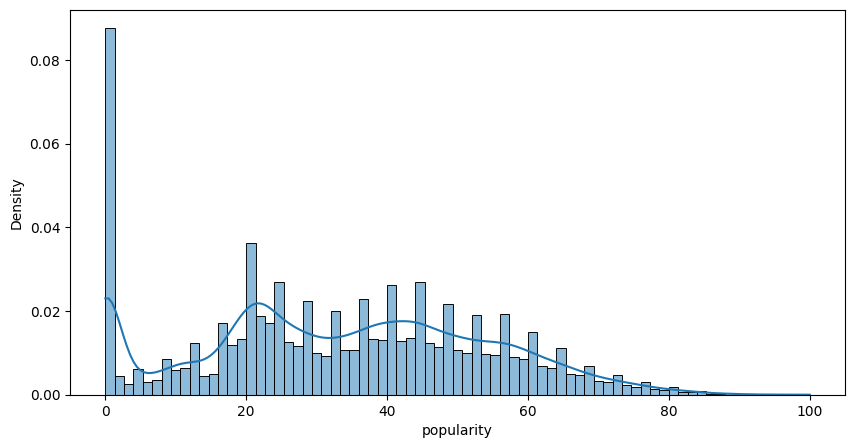

In [ ]:
plt.figure(figsize=(10, 5)) # 그래프의 사이즈를 변경해주는 코드

sns.histplot(data=spotify_df, x='popularity',
             kde=True, stat='density',
             palette='Blues_r') # 히스토그램과 KDE plot을 함께 그려주는 옵션, stat='density'를 넣지 않으면 y축은 단순 수치로 표기

0점 부근에 많은 곡들이 포진해 있고, 10~60점 정도까지는 거의 고르게 분포해 있는 걸로 보입니다.

#### 인기도 점수와 기타 숫자형 변수 간 상관관계 파악

인기도 점수와 관련성이 높은 변수를 찾기 위해, 숫자형 변수 간의 상관관계를 히트맵으로 시각화해 보겠습니다.

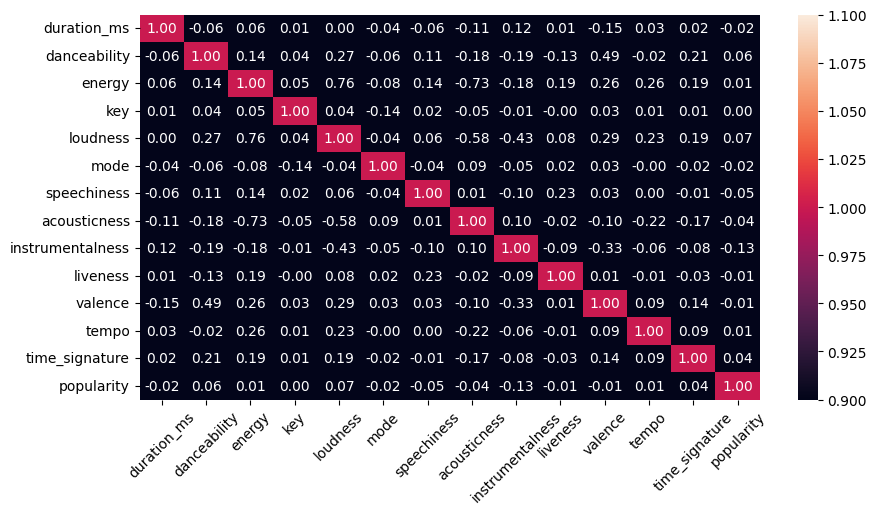

In [ ]:
plt.figure(figsize=(10,5)) # 그래프의 사이즈를 변경해주는 코드

corr_matrix = spotify_df[num_list].corr() # 숫자형 변수만 필터링한 후 컬럼 간의 상관계수를 계산
sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=1,vmax=1) # vmin과 vmax는 colormap의 최솟값과 최댓값을 정해주는 파라미터
plt.xticks(rotation=45) # x축 글씨 45도 회전
plt.show()

`popularity`와 관련성이 높은 변수는 발견되지 않았습니다. 그나마 `instrumentalness`(트랙이 가악곡일 가능성을 나타내는 점수)의 상관계수가 -0.13으로 약한 상관관계를 띄나 중요한 영향력을 갖는다고 보기는 어렵습니다.

`popularity`와 `instrumentalness` 사이의 관계를 파악하기 위해 산점도를 그려 보아도 큰 관련성이 보이지 않습니다.

<Axes: xlabel='instrumentalness', ylabel='popularity'>

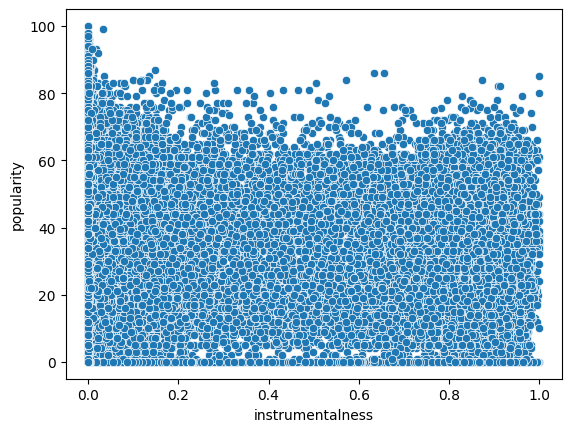

In [ ]:
sns.scatterplot(data=spotify_df, x='instrumentalness', y='popularity')

#### explicit 표현 포함 여부에 따른 인기도 차이

범주형 변수인 explicit (욕설이나 선정적/폭력적/차별적 표현이 포함되어 있는지 여부)에 따른 인기도 차이가 있을지 확인해 보겠습니다.

`sns.boxplot()`과 `sns.barplot()`을 활용하여 explicit 표현 포함 여부에 따른 인기도 차이를 확인해 보겠습니다.

박스 플롯은 explicit 표현 포함 여부에 따른 인기도 분포를 파악하기 위한 목적, 그리고 막대그래프는 그룹별 평균 인기도 점수를 확인하기 위한 목적입니다.

/tmp/ipython-input-2594356883.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_df, x='explicit', y='popularity', palette='Blues', ax=ax1)
/tmp/ipython-input-2594356883.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spotify_df, x='explicit', y='popularity', palette='Blues', ax=ax2)


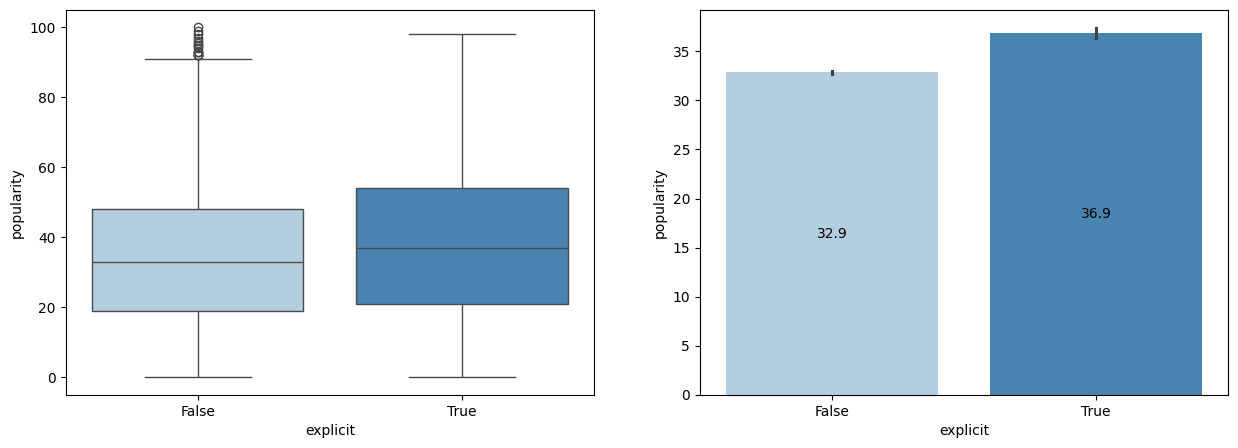

In [ ]:
# 크기를 가로 15인치, 세로 5인치로 하는 1행 2열의 Subplot을 생성합니다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# 첫 번째 Subplot - 박스 플롯
sns.boxplot(data=spotify_df, x='explicit', y='popularity', palette='Blues', ax=ax1)
# 두 번째 Subplot - 막대그래프
sns.barplot(data=spotify_df, x='explicit', y='popularity', palette='Blues', ax=ax2)

# 막대 위에 해당되는 수치를 함께 시각화해 주는 코드입니다.
for c in ax2.containers:
  ax2.bar_label(c, fmt='{:.1f}',
                label_type='center')

`bar_label()`은 matplotlib axes에 붙는 함수로, 그래프 위에 대응되는 값을 함께 시각화해 주기 위해 사용되는 함수입니다.

- 이 함수에 첫 번째 값으로 넣어줘야 하는 것은 막대 그래프의 'Bar Container' 라는 요소로, `ax.containers`의 첫 번째 변수를 받아와서 넣어주면 됩니다. 위에서는 이를 c로 받아와서 넣었습니다.
- 함께 들어가는 'fmt'는 라벨 값을 어떤 포맷으로 정리할 것인지 결정하는 파라미터 입니다.

욕설이나 선정적/폭력적/차별적 표현 등이 포함되어 있는 다소 과격한 트랙이 그렇지 않은 트랙에 비해 인기도가 조금 더 높은 편으로 관찰됩니다.

#### 장르별 인기도 차이

장르별 인기도 차이 역시 비교해 보겠습니다

위에서 `track_genre` 컬럼 내 값을 콤마로 구분해 묶어 주었었는데, 장르별 인기를 살펴보려면 다시 장르별 로우가 구분되어 있는 편이 좋을 것 같습니다.

`str.split()`을 통해 콤마로 구분된 장르들을 리스트로 묶은 뒤 `explode()` 함수를 사용하면 다시 장르별로 로우를 분리해 재구성할 수 있습니다.

In [ ]:
# 먼저, 필요한 컬럼들만 추출해 target_df라는 이름으로 다시 저장
target_df = spotify_df[['track_id','track_genre','popularity']]

# blues, country와 같은 콤마로 구분된 형태의 텍스트를 [blues, country]와 같은 리스트 형태로 변환
target_df['track_genre'] = target_df['track_genre'].str.split(', ')

# 여러 장르가 연결된 6S3JlDAGk3uu3NtZbPnuhS 트랙을 예시 삼아 데이터가 잘 변형되었는지 확인
target_df.query('track_id == "6S3JlDAGk3uu3NtZbPnuhS"')

/tmp/ipython-input-1396386922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['track_genre'] = target_df['track_genre'].str.split(', ')


,track_id,track_genre,popularity
74275,6S3JlDAGk3uu3NtZbPnuhS,"[blues, country, folk, j-pop, j-rock, power-po...",67.0


In [ ]:
# 장르별로 로우가 분리되도록 재구성
explode_df = target_df.explode('track_genre', ignore_index=True)

# 여러장르가 연결된 6S3JlDAGk3uu3NtZbPnuhS 트랙을 예시 삼아 데이터가 잘 변형되었는지 확인
explode_df.query('track_id == "6S3JlDAGk3uu3NtZbPnuhS"')

,track_id,track_genre,popularity
94058,6S3JlDAGk3uu3NtZbPnuhS,blues,67.0
94059,6S3JlDAGk3uu3NtZbPnuhS,country,67.0
94060,6S3JlDAGk3uu3NtZbPnuhS,folk,67.0
94061,6S3JlDAGk3uu3NtZbPnuhS,j-pop,67.0
94062,6S3JlDAGk3uu3NtZbPnuhS,j-rock,67.0
94063,6S3JlDAGk3uu3NtZbPnuhS,power-pop,67.0
94064,6S3JlDAGk3uu3NtZbPnuhS,psych-rock,67.0
94065,6S3JlDAGk3uu3NtZbPnuhS,singer-songwriter,67.0
94066,6S3JlDAGk3uu3NtZbPnuhS,songwriter,67.0


정리가 완료되었으니, unique 장르의 수를 먼저 확인해 봅니다.

In [ ]:
explode_df.track_genre.nunique()

114

장르가 너무 많아 모든 장르의 인기도 점수를 한눈에 비교하기는 어려워 보이므로, 대신 가장 평균 인기도가 높은 장르 10개와 인기도가 낮은 장르 10개를 살펴보겠습니다.

일단, 데이터 수가 너무 적으면 평균값을 비교하기 적합하지 않으므로 100곡 이상이 수록된 장르만 필터링하려 합니다.

`filter()` 함수와 `lambda` 식을 함께 사용하면 특정 조건의 로우만 쉽게 필터링할 수 있습니다.

In [ ]:
explode_df.groupby('track_genre').filter(lambda x: len(x) >= 100)['track_genre'].nunique()

114

그런데 확인해 보니 114개의 장르 모두 100곡 이상이 수록되어 있으므로, 그대로 exploded_df를 사용행 진행하겠습니다.

다음으로 장르별 평균 인기도 점수를 계산하고 내림차순으로 값을 정렬합니다.

In [ ]:
groupby_df = explode_df.groupby('track_genre')['popularity'].mean().reset_index() # 장르별 평균 인기도 점수를 계산
groupby_df = groupby_df.sort_values(by='popularity', ascending=False) # 인기도 순으로 내림차순 정렬
groupby_df.head()

,track_genre,popularity
81,pop-film,59.279780
65,k-pop,56.969439
15,chill,53.698699
94,sad,52.395000
44,grunge,49.583083


이제 위에서 정리한 수치를 바탕으로 평균 인기도 점수 기준 상위 10개와 하위 10개 장르를 시각화하겠습니다.

/tmp/ipython-input-1089925786.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=groupby_df.head(10), x='popularity', y='track_genre', palette='Blues', ax=ax1)
/tmp/ipython-input-1089925786.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=groupby_df.tail(10), x='popularity', y='track_genre', palette='Blues', ax=ax2)


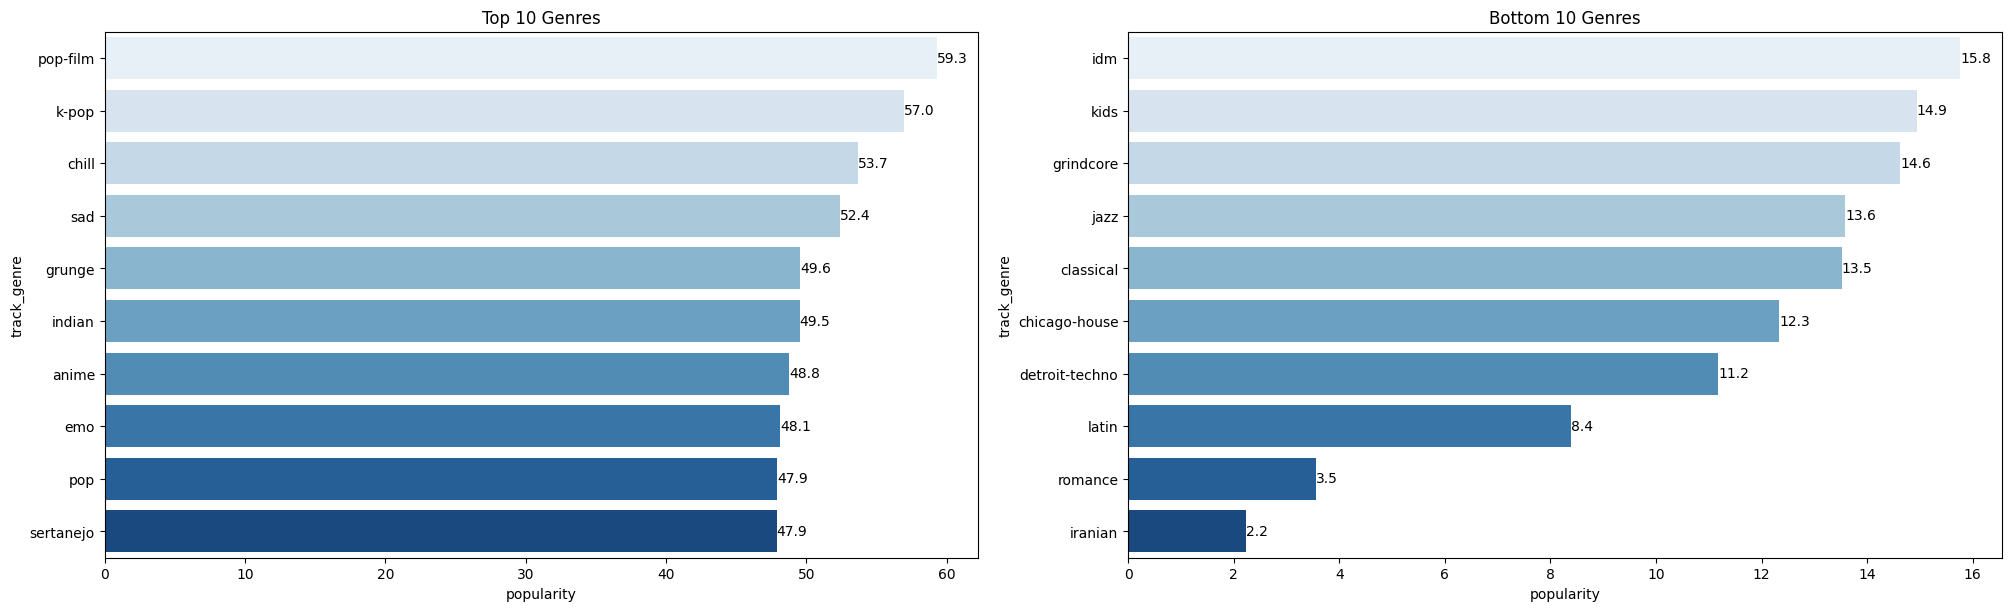

In [ ]:
# 크기를 가로 20인치, 세로 6인치로 하는 1행 2열의 Subplot을 생성합니다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6), constrained_layout=True)

# 첫 번째 Subplot - 평균 인기도 상위 10개 장르 시각화
sns.barplot(data=groupby_df.head(10), x='popularity', y='track_genre', palette='Blues', ax=ax1)

# 제목 추가
ax1.set_title('Top 10 Genres')

# 막대 위에 해당되는 수치를 함께 시각화
for c in ax1.containers:
  ax1.bar_label(c, fmt='{:.1f}')

# 두 번째 Subplot - 평균 인기도 하위 10개 장르 시각화
sns.barplot(data=groupby_df.tail(10), x='popularity', y='track_genre', palette='Blues', ax=ax2)

# 제목 추가
ax2.set_title('Bottom 10 Genres')

# 막대 위에 해당되는 수치를 함께 시각화
for c in ax2.containers:
  ax2.bar_label(c, fmt='{:.1f}')

인기도 점수가 높은 편인 장르는 pop-film, k-pop, chill 등이며 점수가 낮은 편인 장르는 iranian, romance, latin 등 입니다.

### 3-2. 상위 10% 인기곡 특성 분석

이번에는 관점을 조금 바꿔서, 인기도 점수 상위 10%를 차지하는 그룹과 하위 10%를 차지하는 그룹을 비교하는 방식으로 인기 트랙에 필요한 요소가 무엇일지 파악해 보겠습니다.

먼저 상위 10% 그룹과 하위 10% 그룹을 라벨리안 DataFrame을 준비합니다.

In [ ]:
# 인기도 점수 상위 10%에 해당하는 데이터만 필터링한 뒤, 'population_label' 컬럼을 생성해 'Upper 10%'라는 라벨을 붙임
upper_10_percent = spotify_df['popularity'].quantile(0.9)
upper_df = spotify_df.query(f'popularity >= {upper_10_percent}')
upper_df['popularity_label'] = 'Upper 10%'

# 인기도 점수 하위 10%에 해당하는 데이터만 필터링한 뒤, 'population_label' 컬럼을 생성해 'Lower 10%'라는 라벨을 붙임
lower_10_percent = spotify_df['popularity'].quantile(0.1)
lower_df = spotify_df.query(f'popularity <= {lower_10_percent}')
lower_df['popularity_label'] = 'Lower 10%'

# 상위 10% 데이터와 하위 10% 데이터를 concat()으로 합치기
labeled_df = pd.concat([upper_df, lower_df], ignore_index=True)
labeled_df.head()

/tmp/ipython-input-2880275554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upper_df['popularity_label'] = 'Upper 10%'
/tmp/ipython-input-2880275554.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_df['popularity_label'] = 'Lower 10%'


,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity,track_genre,popularity_label
0,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,190203,False,0.679,0.770,0,-3.537,...,0.1900,0.05830,0.00000,0.0825,0.839,161.721,4,62.0,hip-hop,Upper 10%
1,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,222973,False,0.352,0.911,1,-5.230,...,0.0747,0.00121,0.00000,0.0995,0.236,148.033,4,86.0,"alt-rock, alternative, rock",Upper 10%
2,00B7SBwrjbycLMOgAmeIU8,Red Hot Chili Peppers,Return of the Dream Canteen,Reach Out,251588,False,0.663,0.710,11,-5.550,...,0.0599,0.00745,0.00559,0.1470,0.487,120.984,4,66.0,"alt-rock, funk, metal",Upper 10%
3,00Coyxt9mTec1acC52qtWa,TAEIL,Twenty-Five Twenty-One OST Part 1,Starlight,225817,False,0.643,0.735,2,-3.703,...,0.0302,0.07860,0.00000,0.1010,0.502,111.961,4,62.0,k-pop,Upper 10%
4,00FDHurakzVEiPutdUxXXq,Nik Kershaw,Human Racing,Wouldn't It Be Good,277053,False,0.655,0.705,2,-8.529,...,0.0285,0.16900,0.01390,0.0698,0.749,97.007,4,65.0,synth-pop,Upper 10%


In [ ]:
labeled_df.tail()

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity,track_genre,popularity_label
19139,7zkcgtcVShugv4eKTknK4F,Traditional;Albrecht Mayer;Markus Becker,Weihnachten Klassik 2022,Maria durch ein Dornwald ging (Arr. Spindler f...,143284,False,0.104,0.0559,11,-26.744,...,0.0439,0.9910,0.964000,0.0543,0.0778,61.956,3,0.0,sleep,Lower 10%
19140,7znniOrVgnRjxIfwHjA9m6,blink-182,Alternative Christmas 2022,"Happy Holidays, You Bastard",42440,True,0.409,0.9900,11,-2.084,...,0.1150,0.0200,0.000000,0.5130,0.9620,172.715,4,0.0,"punk-rock, punk, rock",Lower 10%
19141,7zo6hLIhyY7zGCR0sWKvth,Anitta;Missy Elliott,Daily Pop Mix,Lobby,157837,False,0.759,0.7110,0,-5.199,...,0.0384,0.0477,0.000001,0.1430,0.4360,111.902,4,0.0,"funk, pagode",Lower 10%
19142,7zrxUrilLtTk4XnT5G7zF8,Ella Fitzgerald,All I Want For Christmas Is You,Frosty The Snowman,131733,False,0.579,0.5020,8,-7.570,...,0.0513,0.7330,0.000000,0.2810,0.8360,76.783,4,0.0,"blues, jazz",Lower 10%
19143,7zubR9uYAWjb5KPZTMm85e,Jhayco;Anuel AA,El perreo es el futuro,Ley Seca,263666,False,0.759,0.8430,8,-3.718,...,0.0913,0.1270,0.000000,0.1140,0.5600,105.016,4,0.0,"latin, latino, reggae, reggaeton",Lower 10%


In [ ]:
# 두 그룹이 비슷한 규모로 잘 분리되었는지 확인
labeled_df['popularity_label'].value_counts()

,count
popularity_label,
Upper 10%,9797
Lower 10%,9347


#### 음향적 특성

인기도 상위 10% 트랙과 하위 10% 트랙의 음향적 특성을 비교해 보겠습니다. 음향적 특성을 나타내는 변수들은 다음과 같습니다.

- duration_ms : 트랙의 길이(밀리초)
- loudness : 트랙의 음량을 데시벨(dB)로 나타낸 값
- tempo : 트랙의 템포를 분당 박자 수 (BPM)으로 나타낸 값
- key : 트랙의 키를 정수 값으로 표현한 것
- mode : 트랙의 음계를 나타내는 정수 값 (0: 단조, 1: 장조)
- time_signature : 트랙의 각 마디 내 박자 수

Text(0.5, 1.0, 'Time_signature')

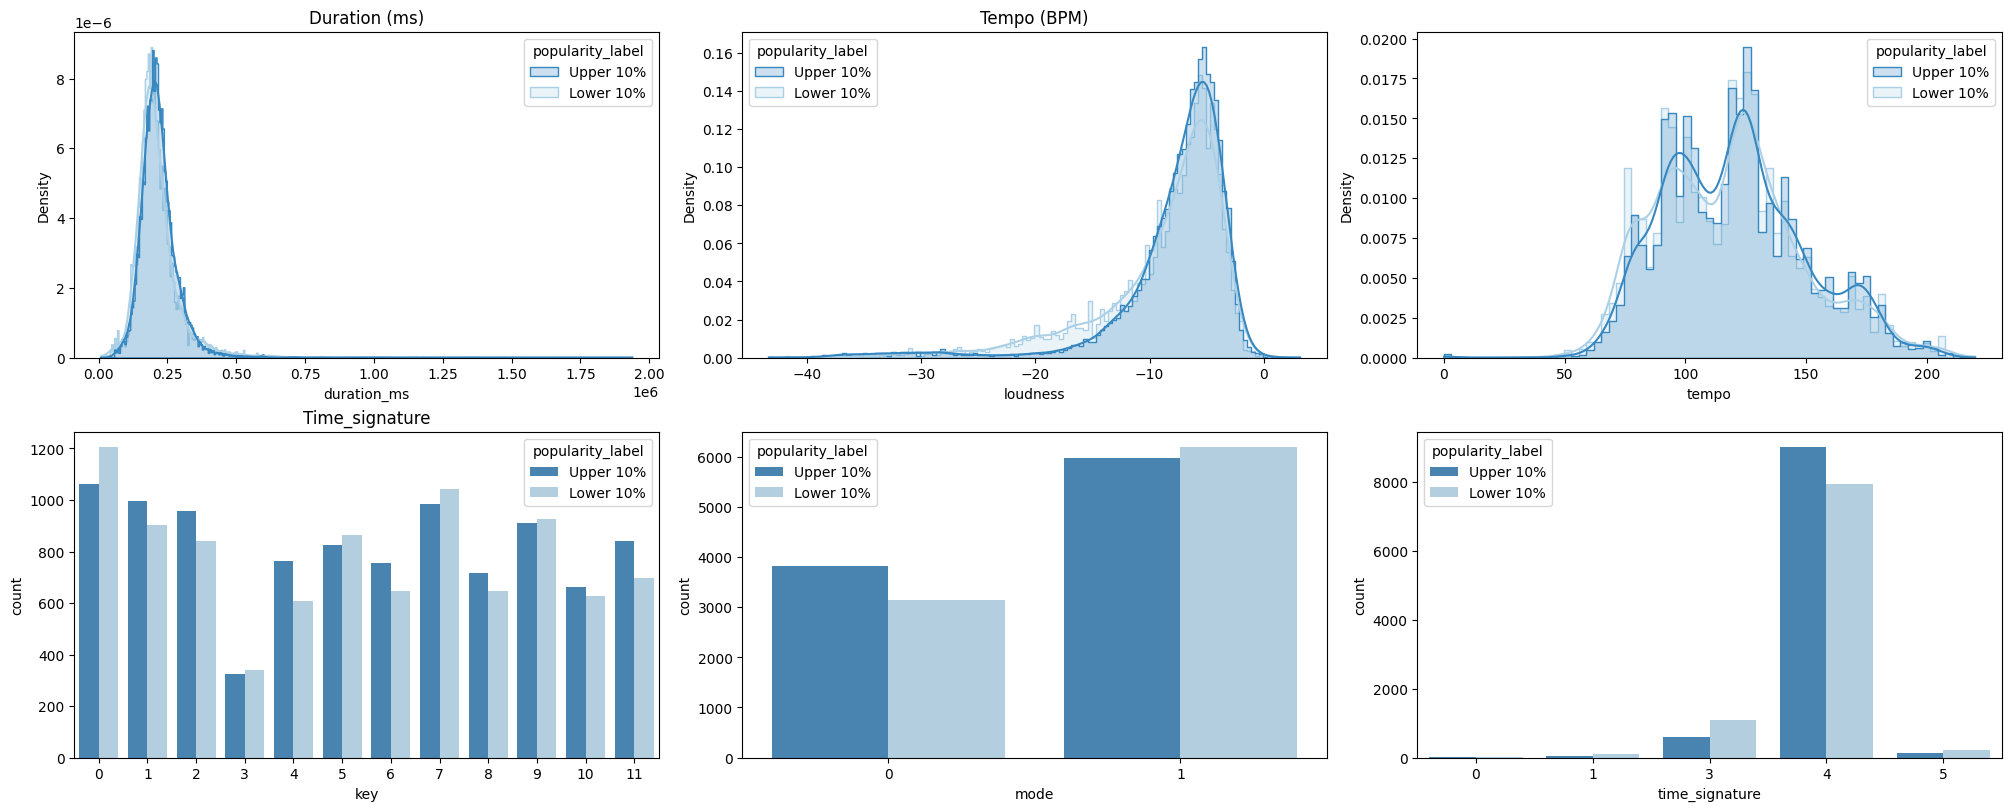

In [ ]:
# 크기를 가로 20인치, 세로 8인치로 하는 2행 3열의 Subplot을 생성
fig, axes = plt.subplots(2, 3, figsize=(20,8), constrained_layout=True)

# duration_ms : 히스토그램 분포 비교
sns.histplot(data=labeled_df, x='duration_ms', hue='popularity_label',
             common_norm=False,
             kde=True, stat='density',
             element='step',
             palette='Blues_r', ax=axes[0,0])
axes[0,0].set_title('Duration (ms)')

# loudness : 히스토그램 분포 비교
sns.histplot(data=labeled_df, x='loudness', hue='popularity_label',
             common_norm=False,
             kde=True, stat='density',
             element='step',
             palette='Blues_r', ax=axes[0,1])
axes[0,1].set_title('Loudness (dB)')

# tempo : 히스토그램 분포 비교
sns.histplot(data=labeled_df, x='tempo', hue='popularity_label',
             common_norm=False,
             kde=True, stat='density',
             element='step',
             palette='Blues_r', ax=axes[0,2])
axes[0,1].set_title('Tempo (BPM)')

# key : Countplot으로 비교
sns.countplot(data=labeled_df, x='key', hue='popularity_label',
             palette='Blues_r', ax=axes[1,0])
axes[1,0].set_title('Key')

# mode : Countplot으로 비교
sns.countplot(data=labeled_df, x='mode', hue='popularity_label',
             palette='Blues_r', ax=axes[1,1])
axes[1,0].set_title('Mode')

# time_signature : Countplot으로 비교
sns.countplot(data=labeled_df, x='time_signature', hue='popularity_label',
             palette='Blues_r', ax=axes[1,2])
axes[1,0].set_title('Time_signature')

In [ ]:
# 각 변수별 평균값을 출력해 함께 비교합니다.
labeled_df.groupby('popularity_label')[['duration_ms', 'loudness','tempo','key','mode','time_signature']].mean()

,duration_ms,loudness,tempo,key,mode,time_signature
popularity_label,,,,,,
Lower 10%,213913.984594,-8.930364,118.415394,5.242324,0.662673,3.870440
Upper 10%,217950.322242,-7.754240,120.447930,5.333776,0.610289,3.932122


해석:
- `Duration (ms)`: 상위 10% 그룹에 조금 더 길이가 긴 곡이 많이 분포하지만, 큰 차이는 나지 않습니다. (평균 차이 약 4초)

- `Loudness (dB)`: 상위 10% 그룹보다 하위 10% 그룹에 더 음량이 작은 곡이 많이 분포하고 있습니다.

- `Tempo (BPM)`: 템포의 분포 차이는 두 그룹 간에 거의 존재하지 않습니다.

- `Key`: 키 역시 두 그룹 간에 큰 차이는 보이지 않습니다.

- `Mode`: 상위 10% 그룹에 상대적으로 단조(`Mode`=0)로 분류되는 곡이 더 많고, 하위 10% 그룹은 상대적으로 장조(`Mode`=1)로 분류되는 곡이 더 많습니다.

- `Time Signature`: 상위 10% 그룹에 상대적으로 4/4 박자를 따르는 곡이 더 많고, 하위 10% 그룹은 상대적으로 3/4 박자를 따르는 곡이 더 많습니다.

#### 감성적 특성

이번에는 인기도 상위 10% 트랙과 하위 10% 트랙의 감성적 특성을 비교해 보겠습니다.
- `danceability` : 트랙이 춤추기 적합한 정도 (0~1 사이의 값)
- `energy` : 트랙의 강도와 활동성
- `valence` : 트랙이 전달하는 음악적 긍정성의 정도 (0~1 사이의 값)
- `acousticness` : 트랙이 어쿠스틱 특성을 가진 정도 (0~1 사이의 값)
- `instrumentalness` : 트랙이 기악곡일 가능성 (0~1 사이의 값)
- `liveness` : 트랙에 라이브 관객의 존재감 정도 (0~1 사이의 값)
- `speechiness` : 트랙에 말하는 부분이 포함된 정도 (0~1 사이의 값)
- `explicit` : 트랙에 욕설이나 선정적/폭력적/차별적 표현이 포함되어 있는지 여부

Text(0.5, 1.0, 'Explicit')

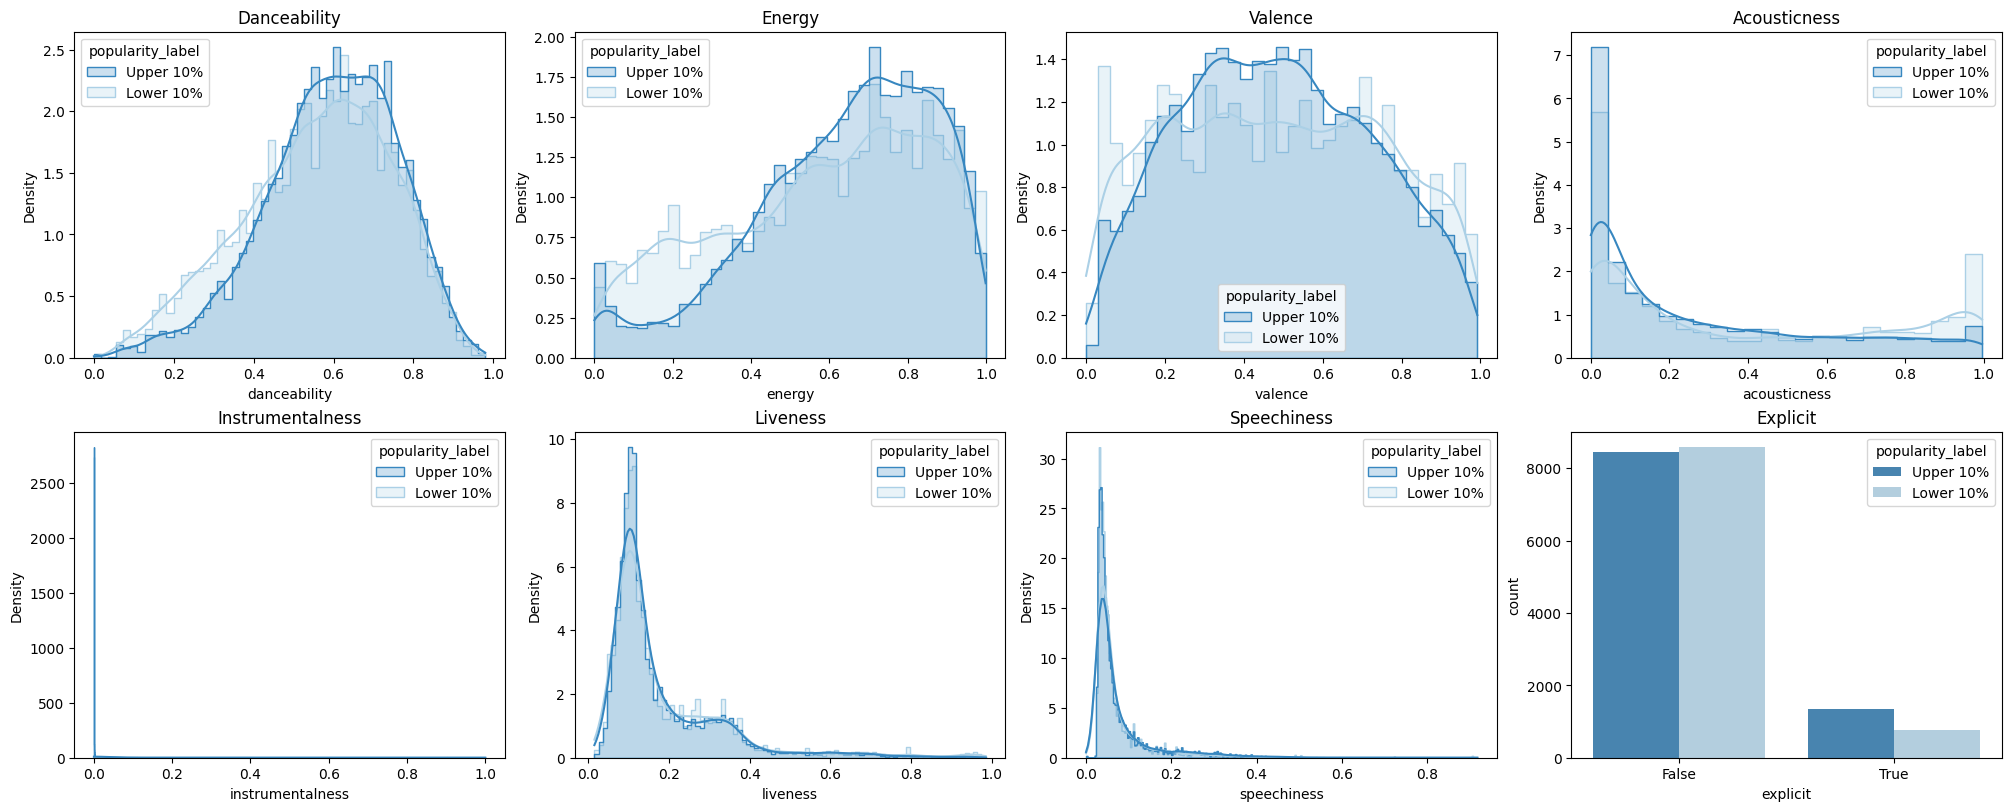

In [ ]:
# 크기를 가로 20인치, 세로 8인치로 하는 2행 4열의 Subplot을 생성
fig, axes = plt.subplots(2,4, figsize=(20,8),constrained_layout=True)

# danceability : 히스토그램 분포 비교
sns.histplot(data=labeled_df, x='danceability', hue='popularity_label',
             common_norm=False, kde=True, stat='density', element='step',
             palette='Blues_r', ax=axes[0,0])
axes[0,0].set_title('Danceability')

# energy : 히스토그램 분포 비교
sns.histplot(data=labeled_df, x='energy', hue='popularity_label',
             common_norm=False, kde=True, stat='density', element='step',
             palette='Blues_r', ax=axes[0,1])
axes[0,1].set_title('Energy')

# valence : 히스토그램 분포 비교
sns.histplot(data=labeled_df, x='valence', hue='popularity_label',
             common_norm=False, kde=True, stat='density', element='step',
             palette='Blues_r', ax=axes[0,2])
axes[0,2].set_title('Valence')

# acousticness : 히스토그램 분포 비교
sns.histplot(data=labeled_df, x='acousticness', hue='popularity_label',
             common_norm=False, kde=True, stat='density', element='step',
             palette='Blues_r', ax=axes[0,3])
axes[0,3].set_title('Acousticness')

# instrumentalness : 히스토그램 분포 비교
sns.histplot(data=labeled_df, x='instrumentalness', hue='popularity_label',
             common_norm=False, kde=True, stat='density', element='step',
             palette='Blues_r', ax=axes[1,0])
axes[1,0].set_title('Instrumentalness')

# liveness : 히스토그램 분포 비교
sns.histplot(data=labeled_df, x='liveness', hue='popularity_label',
             common_norm=False, kde=True, stat='density', element='step',
             palette='Blues_r', ax=axes[1,1])
axes[1,1].set_title('Liveness')

# speechiness : 히스토그램 분포 비교
sns.histplot(data=labeled_df, x='speechiness', hue='popularity_label',
             common_norm=False, kde=True, stat='density', element='step',
             palette='Blues_r', ax=axes[1,2])
axes[1,2].set_title('Speechiness')

# explicit : Countplot 분포 비교
sns.countplot(data=labeled_df, x='explicit', hue='popularity_label',
             palette='Blues_r', ax=axes[1,3])
axes[1,3].set_title('Explicit')

In [ ]:
# 각 변수별 평균값을 출력해 함께 비교
labeled_df.groupby('popularity_label')[['danceability', 'energy','valence','acousticness','instrumentalness', 'liveness', 'speechiness', 'explicit']].mean()

,danceability,energy,valence,acousticness,instrumentalness,liveness,speechiness,explicit
popularity_label,,,,,,,,
Lower 10%,0.555770,0.578289,0.483384,0.390443,0.126109,0.189799,0.074399,0.081951
Upper 10%,0.594434,0.638169,0.484321,0.278639,0.078210,0.180592,0.079579,0.137593


<Axes: xlabel='instrumentalness', ylabel='Density'>

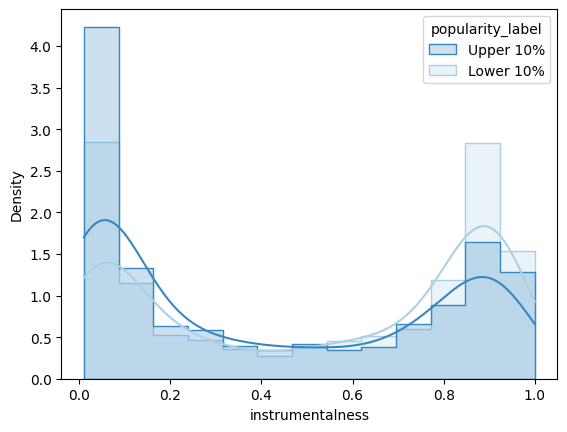

In [ ]:
# instrumentalness의 경우 0에 가까운 값이 너무 많아 분포가 잘 보이지 않으므로, 참고용으로 0.01 이상의 값으로만 필터링해 다시 시각화
sns.histplot(data=labeled_df.query('instrumentalness >= 0.01'), x='instrumentalness', hue='popularity_label',
             common_norm=False, kde=True, stat='density',element='step', palette='Blues_r')

해석:
- `Danceability`: 상위 10% 그룹의 곡들이 하위 10% 그룹에 비해 춤추기에 더 적합한 경향이 있습니다.

- `Energy`: 상위 10% 그룹에 상대적으로 에너지가 높은 곡이 더 많이 포진해 있습니다. 이는 상위 10% 그룹의 곡들이 조금 더 강렬하고 활발한 느낌을 줄 수 있음을 시사합니다.

- `Valence`: 하위 10% 그룹에 속하는 곡들이 조금 더 양극단에 가까운 값을 많이 보이나, 두 그룹 간 Valence의 평균값은 거의 유사합니다.

- `Acousticness`: 하위 10% 그룹의 곡들이 상위 10% 그룹에 비해 어쿠스틱 특성이 조금 더 강합니다.

- `Instrumentalness`: 하위 10% 그룹이 곡들이 상위 10% 그룹에 비해 조금 더 기악곡에 가까운 특성을 갖는 경향이 있습니다.

- `Liveness`: 두 그룹 간 분포 차이가 거의 보이지 않습니다.

- `Speechiness`: 역시 두 그룹 사이의 차이가 거의 보이지 않습니다.

- `Explicit`: 상위 10% 그룹의 곡들이 하위 10% 그룹에 비해 욕설이나 선정적/폭력적/차별적 표현을 포함하고 있을 가능성이 더 높습니다. 이는 상위 10% 그룹의 곡들에 보다 자극적인 가사가 많을 수 있음을 시사합니다.

#### 장르적 특성

마지막으로, 인기도 상위 10% 트랙과 하위 10% 트랙의 주요 장르를 비교해
보겠습니다.

먼저, 상위 10% 그룹에서 많이 등장하는 장르를 살펴보겠습니다. `collections`
모듈의 `Counter` 클래스를 활용하면 각 장르의 등장 빈도를 집계할 수 있습니다.

In [ ]:
from collections import Counter

# 장르를 blues, country와 같이 콤마로 구분된 형태의 텍스트에서 [blues, country]와 같은 리스트 형태로 변환해 저장
track_genre_list = upper_df['track_genre'].str.split(', ')

# 각 장르의 등장 빈도를 세기 위해 Counter 객체를 생성
c = Counter()

# 장르별 등장 빈도를 계산
for genre_list in track_genre_list:
  c.update(genre_list)

# 장르별 빈도수 정보를 DataFrame 형태로 정리한 후, 빈도수 기준 내림차순 정렬해 5개 장르를 출력합니다.
count_df = pd.DataFrame.from_dict(c, orient='index', columns=['count'])
count_df.sort_values(by='count', ascending=False).head(5)

,count
pop,644
pop-film,530
k-pop,502
metal,472
electro,449


하위 10% 그룹에서 많이 등장하는 장르도 이어서 살펴보겠습니다.

In [ ]:
track_genre_list = lower_df['track_genre'].str.split(', ')

c = Counter()

for genre_list in track_genre_list:
  c.update(genre_list)

count_df = pd.DataFrame.from_dict(c, orient='index', columns=['count'])
count_df.sort_values(by='count', ascending=False).head(5)

,count
jazz,680
iranian,648
soul,608
country,583
latin,564


상위 10% 그룹에는 pop, pop-film, k-pop 등 조금 더 현대적이고 대중적인 장르가 많고, 하위 10% 그룹에는 jazz, iranian, soul 등 상대적으로 대중성이 약한 장르가 많이 속해있는 것으로 보입니다.

#### 결론

Spotify 노래 인기 요인 정리:
- 어쿠스틱하고 기악곡에 가까운 곳보다 춤추기에 적합하며 에너지가 높은 곡들이 인기를 얻을 가능성이 더 높다고 추측됨
- 욕설이나 선정적/폭력적/차별적 표현을 포함하는 자극적인 곡이 인기를 얻을 가능성이 상대적으로 높다고 추측됨
- pop, pop-film, k-pop 등 현대적이고 대중적인 장르에 속한 곡이 인기를 얻을 가능성이 높아 보임